<h3>Monte Carlo com VAR e VEC</h3>

<h4>Importação dos Módulos e Inicialização das Variáveis</h4>

In [105]:
from Neuraline.Utilities.data import DataTable, DataExploration, ConvertData # manipulação de dados
from Neuraline.ArtificialIntelligence.MachineLearning.AutonomousLearning.vector_auto_regressive import VectorAutoRegressive # algoritmo var
from Neuraline.ArtificialIntelligence.MachineLearning.AutonomousLearning.vector_error_correction import VectorErrorCorrection # algoritmo vec
from Neuraline.ArtificialIntelligence.MachineLearning.AutonomousLearning.monte_carlo import MonteCarlo # algoritmo de monte carlo
from Neuraline.Utilities.chart import Chart # plotagem de gráficos
from statistics import mean # função para cálculo da média
# instanciação dos objetos/variáveis
data_table, data_exploration, convert_data, chart = DataTable(), DataExploration(), ConvertData(), Chart()
var, vec, monte_carlo = VectorAutoRegressive(), VectorErrorCorrection(), MonteCarlo()
url_path, url_save = './dolar_original.csv', './dolar_atualizado.csv'

<h4>Formatação do Arquivo CSV</h4>

In [106]:
# leitura do arquivo csv
str_csv = convert_data.readTEXT(url_path)
# retira as vírgulas de dentro dos valores das colunas e substitui por ponto (também elimina as aspas dos números)
str_csv = str_csv.replace('","', '";"').replace(',', '.').replace('";"', '","').replace('"', '').strip()
# escrita do novo arquivo atualizado
convert_data.writeTEXT(text=str_csv, url_path=url_save)
# exibição do conteúdo do novo arquivo atualizado
result = data_table.visualization_csv_inline(url_path=url_save, limit=10)

╒════════════════════╤══════════╤════════════╤══════════╤══════════╤═════════╤════════╕
│ ﻿Data              │   Último │   Abertura │   Máxima │   Mínima │ Vol.    │ Var%   │
╞════════════════════╪══════════╪════════════╪══════════╪══════════╪═════════╪════════╡
│ 26 de ago. de 2022 │   5.0601 │     5.1102 │   5.1175 │   5.054  │ 165.72K │ -0.97% │
├────────────────────┼──────────┼────────────┼──────────┼──────────┼─────────┼────────┤
│ 25 de ago. de 2022 │   5.1099 │     5.1114 │   5.1437 │   5.0852 │ 132.30K │ -0.03% │
├────────────────────┼──────────┼────────────┼──────────┼──────────┼─────────┼────────┤
│ 24 de ago. de 2022 │   5.1114 │     5.105  │   5.1244 │   5.0802 │ 128.42K │ 0.15%  │
├────────────────────┼──────────┼────────────┼──────────┼──────────┼─────────┼────────┤
│ 23 de ago. de 2022 │   5.1037 │     5.1576 │   5.1579 │   5.07   │ 131.87K │ -1.04% │
├────────────────────┼──────────┼────────────┼──────────┼──────────┼─────────┼────────┤
│ 22 de ago. de 2022 │   5.1574 

<h4>Predição Futura sem Monte Carlo</h4>

(TAMANHO ORIGINAL DA AMOSTRA) y_training: 136 - y_test: 34
Resultado para VAR (sem Monte Carlo):


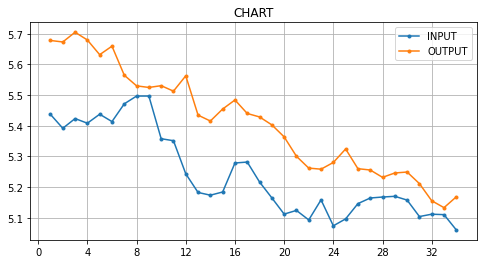

Resultado para VEC (sem Monte Carlo):


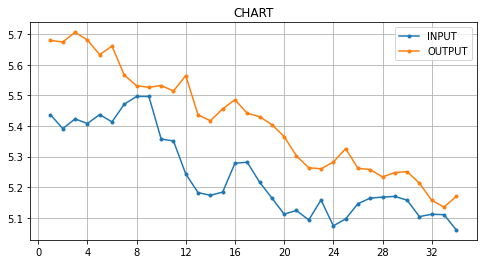

In [107]:
# separação dos dados em treinamento e teste
y_training, _, y_test, _ = data_exploration.dataSeparationCSV(url_path=url_save, list_inputs=['Último'], training_percentage=.8, test_percentage=.2)
print(f'(TAMANHO ORIGINAL DA AMOSTRA) y_training: {len(y_training)} - y_test: {len(y_test)}')
# treinamento e predição dos algoritmos var e vec sem monte carlo
var.fit(inputs=y_training, error=0, preprocessor='standardization'), vec.fit(inputs=y_training, error=0, preprocessor='standardization')
result_var, result_vec = var.predict(predictions=len(y_test)), vec.predict(predictions=len(y_test))
# calcula o erro médio antes do monte carlo
average_error_var = round(mean([abs(a[0]-b[0])/max([a[0], b[0]]) for a, b in zip(y_test, result_var)])*100, 2)
average_error_vec = round(mean([abs(a[0]-b[0])/max([a[0], b[0]]) for a, b in zip(y_test, result_vec)])*100, 2)
average_error1 = mean([average_error_var, average_error_vec])
# plotagem gráfica dos dados (linha azul: expectativa, linha laranja: realidade)
print('Resultado para VAR (sem Monte Carlo):')
chart.plotMATRIX(matrix1=y_test, matrix2=result_var)
print('Resultado para VEC (sem Monte Carlo):')
chart.plotMATRIX(matrix1=y_test, matrix2=result_vec)

<h4>Predição Futura COM Monte Carlo</h4>

(TAMANHO ORIGINAL DA AMOSTRA) y_training: 136 - y_test: 34
(TAMANHO DA AMOSTRA DEPOIS DO ACRÉSCIMO) y_training: 236 - y_test: 34
Resultado para VAR (COM MONTYE CARLO):


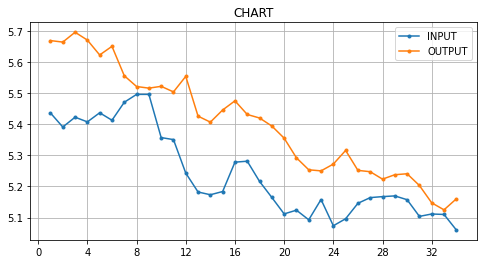

Resultado para VEC (COM MONTYE CARLO):


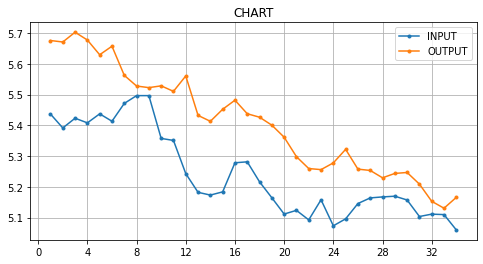

erro médio sem monte carlo: 3.12%
erro médio com monte carlo: 3.01%


In [109]:
# separação dos dados em treinamento e teste
y_training, _, y_test, _ = data_exploration.dataSeparationCSV(url_path=url_save, list_inputs=['Último'], training_percentage=.8, test_percentage=.2)
print(f'(TAMANHO ORIGINAL DA AMOSTRA) y_training: {len(y_training)} - y_test: {len(y_test)}')
# treinamento e predição do método de monte carlo
monte_carlo.fit(inputs=y_training)
new_y = monte_carlo.method(predictions=100)
# união da lista original com a lista simulada
y_training = y_training+new_y
print(f'(TAMANHO DA AMOSTRA DEPOIS DO ACRÉSCIMO) y_training: {len(y_training)} - y_test: {len(y_test)}')
# treinamento e predição dos algoritmos var e vec com monte carlo
var.fit(inputs=y_training, error=0, preprocessor='standardization'), vec.fit(inputs=y_training, error=0, preprocessor='standardization')
result_var, result_vec = var.predict(predictions=len(y_test)), vec.predict(predictions=len(y_test))
# calcula o erro médio depois do monte carlo
average_error_var = round(mean([abs(a[0]-b[0])/max([a[0], b[0]]) for a, b in zip(y_test, result_var)])*100, 2)
average_error_vec = round(mean([abs(a[0]-b[0])/max([a[0], b[0]]) for a, b in zip(y_test, result_vec)])*100, 2)
average_error2 = mean([average_error_var, average_error_vec])
# plotagem gráfica dos dados (linha azul: expectativa, linha laranja: realidade)
print('Resultado para VAR (COM MONTYE CARLO):')
chart.plotMATRIX(matrix1=y_test, matrix2=result_var)
print('Resultado para VEC (COM MONTYE CARLO):')
chart.plotMATRIX(matrix1=y_test, matrix2=result_vec)
# exibição dos erros médios antes e depois do monte carlo
print(f'erro médio sem monte carlo: {average_error1:.2f}%\nerro médio com monte carlo: {average_error2:.2f}%')

<h4>Salva os Modelos com o Melhor Resultado</h4>

In [110]:
result = var.saveModel('melhor_resultado_var') # salva o melhor resultado para var (com relação a média entre os dois)
result = vec.saveModel('melhor_resultado_vec') # salva o melhor resultado para vec (com relação a média entre os dois)